In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from random import choices
import scipy.interpolate
from fitter import Fitter
import time

In [2]:
import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

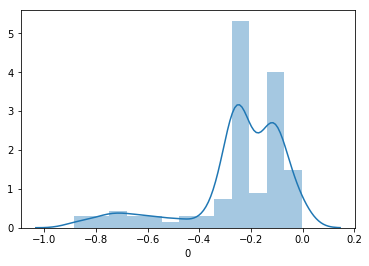

In [5]:
activator = "relu"
dataset = 'handsign_mnist'
kernel_no = 0
eigen_no = 0

kernel0 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(0) + ".csv")
kernel1 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(1) + ".csv")
kernel2 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(2) + ".csv")
kernel3 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(3) + ".csv")
kernel4 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(4) + ".csv")
kernel5 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(5) + ".csv")
kernel6 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(6) + ".csv")
kernel7 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(7) + ".csv")
kernel8 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(8) + ".csv")
kernel9 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(9) + ".csv")

kernel = pd.concat([kernel0['0'], kernel1['0'], kernel2['0'], kernel3['0'], kernel4['0'], 
                    kernel5['0'], kernel6['0'], kernel7['0'], kernel8['0'], kernel9['0']])

sns.distplot(kernel)

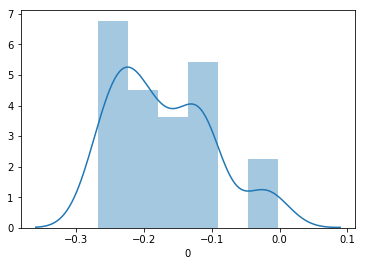

In [6]:
activator = "relu"
dataset = 'fashion_mnist'
kernel_no = 0
eigen_no = 0

kernel0 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(0) + ".csv")
kernel1 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(1) + ".csv")
kernel2 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(2) + ".csv")
kernel3 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(3) + ".csv")
kernel4 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(4) + ".csv")
kernel5 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(5) + ".csv")
kernel6 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(6) + ".csv")
kernel7 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(7) + ".csv")
kernel8 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(8) + ".csv")
kernel9 = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(9) + ".csv")

kernel = pd.concat([kernel0['0'], kernel1['0'], kernel2['0'], kernel3['0'], kernel4['0'], 
                    kernel5['0'], kernel6['0'], kernel7['0'], kernel8['0'], kernel9['0']])

sns.distplot(kernel)

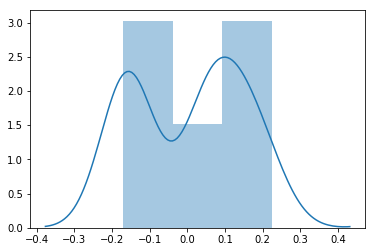

In [25]:
dataset = 'fashion_mnist'
kernel_no = 0
eigen_no = 0

kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")

sns.distplot(kernel)

In [4]:
dataset = 'mnist'


df_sgmd = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_tanh = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_relu = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

activator = "sgmd"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_sgmd = df_sgmd.append(pd.Series(eigens, index=df_sgmd.columns), ignore_index=True)

activator = "tanh"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_tanh = df_tanh.append(pd.Series(eigens, index=df_tanh.columns), ignore_index=True)

    
activator = "relu"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_relu = df_relu.append(pd.Series(eigens, index=df_relu.columns), ignore_index=True)


Progress: [####################] 100.0%


In [5]:
dataset = 'fashion_mnist'


df_sgmd1 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_tanh1 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_relu1 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

activator = "sgmd"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_sgmd1 = df_sgmd1.append(pd.Series(eigens, index=df_sgmd1.columns), ignore_index=True)

activator = "tanh"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_tanh1 = df_tanh1.append(pd.Series(eigens, index=df_tanh1.columns), ignore_index=True)

    
activator = "relu"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_relu1 = df_relu1.append(pd.Series(eigens, index=df_relu1.columns), ignore_index=True)


Progress: [####################] 100.0%


In [6]:
dataset = 'handsign_mnist'


df_sgmd2 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_tanh2 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

df_relu2 = pd.DataFrame(columns=['Eigenvalue 0', 'Eigenvalue 1', 'Eigenvalue 2', 'Eigenvalue 3', 'Eigenvalue 4'])

activator = "sgmd"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_sgmd2 = df_sgmd2.append(pd.Series(eigens, index=df_sgmd2.columns), ignore_index=True)

activator = "tanh"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_tanh2 = df_tanh2.append(pd.Series(eigens, index=df_tanh2.columns), ignore_index=True)

    
activator = "relu"

for kernel_no in range(0, 10):
    kernel = pd.read_csv(dataset + "/results/" + activator + "/cnn_K" + str(kernel_no) + ".csv")
    eigens = []
    for eigen_no in range(0, 5):
        x = scipy.stats.norm.cdf(kernel[str(eigen_no)])
        eigens.append(get_best_fit(x))
        update_progress(eigen_no / 5)
        
    update_progress(1)
    df_relu2 = df_relu2.append(pd.Series(eigens, index=df_relu2.columns), ignore_index=True)


Progress: [####################] 100.0%


In [7]:
df_sgmd

,Eigenvalue 0,Eigenvalue 1,Eigenvalue 2,Eigenvalue 3,Eigenvalue 4
0,genpareto,powerlaw,uniform,uniform,uniform
1,powerlaw,genpareto,uniform,uniform,uniform
2,powerlaw,powerlaw,uniform,uniform,powerlaw
3,powerlaw,uniform,uniform,genpareto,powerlaw
4,powerlaw,powerlaw,genpareto,genpareto,genpareto
5,powerlaw,genpareto,uniform,uniform,genpareto
6,genpareto,genpareto,powerlaw,powerlaw,powerlaw
7,powerlaw,powerlaw,uniform,powerlaw,genpareto
8,powerlaw,powerlaw,powerlaw,powerlaw,powerlaw
9,bradford,powerlaw,genpareto,powerlaw,powerlaw


In [9]:
df_sgmd1

,Eigenvalue 0,Eigenvalue 1,Eigenvalue 2,Eigenvalue 3,Eigenvalue 4
0,powerlaw,powerlaw,bradford,uniform,uniform
1,uniform,uniform,uniform,uniform,uniform
2,genpareto,uniform,uniform,uniform,uniform
3,uniform,uniform,uniform,uniform,uniform
4,uniform,genpareto,powerlaw,bradford,powerlaw
5,genpareto,uniform,powerlaw,uniform,uniform
6,powerlaw,uniform,uniform,uniform,powerlaw
7,uniform,uniform,uniform,powerlaw,uniform
8,uniform,uniform,genpareto,powerlaw,genpareto
9,genpareto,uniform,uniform,uniform,uniform


In [10]:
df_sgmd2

,Eigenvalue 0,Eigenvalue 1,Eigenvalue 2,Eigenvalue 3,Eigenvalue 4
0,genpareto,powerlaw,genpareto,uniform,uniform
1,genpareto,powerlaw,genpareto,genpareto,genpareto
2,powerlaw,genpareto,powerlaw,powerlaw,genpareto
3,bradford,uniform,powerlaw,powerlaw,genpareto
4,powerlaw,powerlaw,powerlaw,powerlaw,powerlaw
5,bradford,genpareto,genpareto,uniform,genpareto
6,uniform,uniform,genpareto,powerlaw,genpareto
7,bradford,powerlaw,powerlaw,uniform,genpareto
8,powerlaw,powerlaw,powerlaw,powerlaw,powerlaw
9,bradford,uniform,uniform,powerlaw,genpareto


In [20]:
a = df_sgmd['Eigenvalue 0'].value_counts()
b = df_sgmd['Eigenvalue 1'].value_counts()
c = df_sgmd['Eigenvalue 2'].value_counts()
d = df_sgmd['Eigenvalue 3'].value_counts()
e = df_sgmd['Eigenvalue 4'].value_counts()

d = d.add(e,fill_value=0)
c = c.add(d,fill_value=0)
b = b.add(c,fill_value=0)
a = a.add(b,fill_value=0)

print(a)

bradford      1.0
genpareto    12.0
powerlaw     24.0
uniform      13.0
dtype: float64


In [21]:
a = df_sgmd1['Eigenvalue 0'].value_counts()
b = df_sgmd1['Eigenvalue 1'].value_counts()
c = df_sgmd1['Eigenvalue 2'].value_counts()
d = df_sgmd1['Eigenvalue 3'].value_counts()
e = df_sgmd1['Eigenvalue 4'].value_counts()

d = d.add(e,fill_value=0)
c = c.add(d,fill_value=0)
b = b.add(c,fill_value=0)
a = a.add(b,fill_value=0)

print(a)

bradford      2.0
genpareto     6.0
powerlaw      9.0
uniform      33.0
dtype: float64


In [22]:
a = df_sgmd2['Eigenvalue 0'].value_counts()
b = df_sgmd2['Eigenvalue 1'].value_counts()
c = df_sgmd2['Eigenvalue 2'].value_counts()
d = df_sgmd2['Eigenvalue 3'].value_counts()
e = df_sgmd2['Eigenvalue 4'].value_counts()

d = d.add(e,fill_value=0)
c = c.add(d,fill_value=0)
b = b.add(c,fill_value=0)
a = a.add(b,fill_value=0)

print(a)

bradford      4.0
genpareto    16.0
powerlaw     21.0
uniform       9.0
dtype: float64
